In [114]:
import warnings
warnings.filterwarnings('ignore')

In [115]:
import pandas as pd
import sqlite3
import pickle

In [134]:
conn = sqlite3.connect('embeddings.db')
df = pd.read_sql_query("SELECT id, summary, title, authors, subjects, bookshelves from llama_embeddings", conn, index_col='id')

In [135]:
# df['text'] = [pickle.loads(text) for text in df['text']]
for column in ['summary', 'title', 'authors', 'subjects',   'bookshelves']:
    df[column] = [pickle.loads(text) for text in df[column]]

In [136]:
print(f'Number of rows: {len(df)}')
df.head()

Number of rows: 15253


,summary,title,authors,subjects,bookshelves
id,,,,,
1,"[-0.10176070034503937, 0.007942539639770985, 0...","[-0.01026034913957119, 0.009973442181944847, 0...","[[-0.011376812122762203, -0.006715957075357437...","[[-0.004802127368748188, -0.014699180610477924...","[[-0.04011578485369682, 0.04477154091000557, 0..."
2,"[-0.05642512068152428, 0.016936874017119408, -...","[-0.0936107188463211, -0.05000295490026474, 0....","[[0.003930508624762297, -0.021613741293549538,...","[[-0.019040683284401894, -0.04767512157559395,...","[[-0.04011578485369682, 0.04477154091000557, 0..."
3,"[-0.04787103459239006, 0.043358348309993744, 0...","[-0.06682515889406204, -0.00882570631802082, 0...","[[-0.08240365236997604, 0.021866029128432274, ...","[[-0.07022667676210403, 0.006524343509227037, ...","[[-0.028188010677695274, 0.03697013482451439, ..."
4,"[0.020010314881801605, -0.0032934043556451797,...","[-0.046828411519527435, 0.04849471524357796, 0...","[[-0.028349613770842552, 0.06836843490600586, ...","[[-0.06208223104476929, 0.03326922655105591, 0...","[[-0.010167899541556835, -0.008022290654480457..."
5,"[-0.04907809942960739, -0.041994184255599976, ...","[-0.03496657684445381, -0.043803293257951736, ...","[[0.003930508624762297, -0.021613741293549538,...","[[-0.029587898403406143, 0.005127390846610069,...","[[0.003930508624762297, -0.021613741293549538,..."


In [141]:
conn = sqlite3.connect('catalog.db')
catalog = pd.read_sql_query("SELECT id, issued, language, LoCC from books;", conn, parse_dates=['issued'], index_col='id')

In [142]:
result = pd.concat([df, catalog], axis=1, join="inner")

In [143]:
print(f'Number of rows: {len(result)}')
result.head()

Number of rows: 15253


,summary,title,authors,subjects,bookshelves,issued,language,LoCC
id,,,,,,,,
1,"[-0.10176070034503937, 0.007942539639770985, 0...","[-0.01026034913957119, 0.009973442181944847, 0...","[[-0.011376812122762203, -0.006715957075357437...","[[-0.004802127368748188, -0.014699180610477924...","[[-0.04011578485369682, 0.04477154091000557, 0...",1970-01-01,en,"[""E201"", "" JK""]"
2,"[-0.05642512068152428, 0.016936874017119408, -...","[-0.0936107188463211, -0.05000295490026474, 0....","[[0.003930508624762297, -0.021613741293549538,...","[[-0.019040683284401894, -0.04767512157559395,...","[[-0.04011578485369682, 0.04477154091000557, 0...",1970-01-01,en,"[""JK"", "" KF""]"
3,"[-0.04787103459239006, 0.043358348309993744, 0...","[-0.06682515889406204, -0.00882570631802082, 0...","[[-0.08240365236997604, 0.021866029128432274, ...","[[-0.07022667676210403, 0.006524343509227037, ...","[[-0.028188010677695274, 0.03697013482451439, ...",1970-01-01,en,"[""E838""]"
4,"[0.020010314881801605, -0.0032934043556451797,...","[-0.046828411519527435, 0.04849471524357796, 0...","[[-0.028349613770842552, 0.06836843490600586, ...","[[-0.06208223104476929, 0.03326922655105591, 0...","[[-0.010167899541556835, -0.008022290654480457...",1970-01-01,en,"[""E456""]"
5,"[-0.04907809942960739, -0.041994184255599976, ...","[-0.03496657684445381, -0.043803293257951736, ...","[[0.003930508624762297, -0.021613741293549538,...","[[-0.029587898403406143, 0.005127390846610069,...","[[0.003930508624762297, -0.021613741293549538,...",1970-01-01,en,"[""JK"", "" KF""]"


# Cluster the data

In [157]:
clusterable = result.copy()
pd.concat([clusterable, pd.DataFrame(clusterable['summary'].tolist(), index=clusterable.index).add_prefix('summary')], axis=1)

,summary,title,authors,subjects,bookshelves,issued,language,LoCC,summary0,summary1,...,summary374,summary375,summary376,summary377,summary378,summary379,summary380,summary381,summary382,summary383
id,,,,,,,,,,,,,,,,,,,,,
1,"[-0.10176070034503937, 0.007942539639770985, 0...","[-0.01026034913957119, 0.009973442181944847, 0...","[[-0.011376812122762203, -0.006715957075357437...","[[-0.004802127368748188, -0.014699180610477924...","[[-0.04011578485369682, 0.04477154091000557, 0...",1970-01-01,en,"[""E201"", "" JK""]",-0.101761,0.007943,...,0.016934,0.050285,-0.031707,0.046737,0.059020,-0.024716,0.017685,-0.007178,0.018322,-0.007554
2,"[-0.05642512068152428, 0.016936874017119408, -...","[-0.0936107188463211, -0.05000295490026474, 0....","[[0.003930508624762297, -0.021613741293549538,...","[[-0.019040683284401894, -0.04767512157559395,...","[[-0.04011578485369682, 0.04477154091000557, 0...",1970-01-01,en,"[""JK"", "" KF""]",-0.056425,0.016937,...,-0.001822,0.036497,0.023223,0.055126,-0.022461,-0.022392,0.020225,0.024757,0.077563,0.059659
3,"[-0.04787103459239006, 0.043358348309993744, 0...","[-0.06682515889406204, -0.00882570631802082, 0...","[[-0.08240365236997604, 0.021866029128432274, ...","[[-0.07022667676210403, 0.006524343509227037, ...","[[-0.028188010677695274, 0.03697013482451439, ...",1970-01-01,en,"[""E838""]",-0.047871,0.043358,...,0.022586,-0.002559,0.027594,0.051944,-0.003725,0.003400,0.023702,-0.001395,-0.005018,-0.028817
4,"[0.020010314881801605, -0.0032934043556451797,...","[-0.046828411519527435, 0.04849471524357796, 0...","[[-0.028349613770842552, 0.06836843490600586, ...","[[-0.06208223104476929, 0.03326922655105591, 0...","[[-0.010167899541556835, -0.008022290654480457...",1970-01-01,en,"[""E456""]",0.020010,-0.003293,...,0.053959,-0.036641,-0.024920,0.008323,0.003984,-0.007579,-0.034353,-0.019649,0.026299,-0.015358
5,"[-0.04907809942960739, -0.041994184255599976, ...","[-0.03496657684445381, -0.043803293257951736, ...","[[0.003930508624762297, -0.021613741293549538,...","[[-0.029587898403406143, 0.005127390846610069,...","[[0.003930508624762297, -0.021613741293549538,...",1970-01-01,en,"[""JK"", "" KF""]",-0.049078,-0.041994,...,-0.038921,0.065063,-0.022220,-0.016729,0.023740,-0.023696,0.017951,0.015225,0.084870,0.036009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16058,"[-0.06122007593512535, 0.010136238299310207, -...","[-0.05348008871078491, 0.05305005982518196, -0...","[[-0.005660507827997208, -0.007323262747377157...","[[0.02963382750749588, 0.05486637353897095, -0...","[[-0.02378043718636036, 0.03442604839801788, 0...",1970-01-01,en,"[""BF""]",-0.061220,0.010136,...,-0.005369,-0.043710,0.051627,0.012487,0.033729,-0.006802,0.016343,0.091020,0.050317,0.044156
16059,"[0.04294643923640251, -0.003314455272629857, 0...","[-0.022915296256542206, 0.0025956931058317423,...","[[-0.10277436673641205, -0.029757311567664146,...","[[0.005528301000595093, 0.014249295927584171, ...","[[-0.011576350778341293, 0.02444837987422943, ...",1970-01-01,en; es,"[""PQ""]",0.042946,-0.003314,...,-0.019652,0.010890,0.015324,-0.037834,-0.005629,0.009276,-0.054439,0.030743,0.057072,0.020533
16060,"[-0.018558867275714874, 0.05929296836256981, 0...","[-0.02070617862045765, 0.07087047398090363, -0...","[[-0.020300710573792458, -0.0781797468662262, ...","[[0.021512504667043686, 0.03875696286559105, 0...","[[0.025988470762968063, 0.08311842381954193, -...",1970-01-01,en,"[""BV""]",-0.018559,0.059293,...,0.026587,-0.031617,-0.039330,-0.004798,-0.047784,-0.051623,-0.040522,-0.038496,0.031651,0.014090


In [160]:
clusterable = result.copy()
for column in ['summary', 'title']:
    clusterable = pd.concat([clusterable, pd.DataFrame(clusterable[column].tolist(), index=clusterable.index).add_prefix(column)], axis=1)
    clusterable = clusterable.drop(column, axis=1)
for column in ['authors', 'subjects', 'bookshelves']:
    def add_vectors(vecs):
        ret = vecs[0].copy()
        for vec in vecs[1:]:
            for indx, val in enumerate(vec):
                ret[indx] += val
        return ret
    clusterable[column] = clusterable[column].apply(add_vectors)
    clusterable = pd.concat([clusterable, pd.DataFrame(clusterable[column].tolist(), index=clusterable.index).add_prefix(column)], axis=1)
    clusterable = clusterable.drop(column, axis=1)
clusterable = clusterable.drop(['issued', 'LoCC'], axis=1)
clusterable = clusterable.copy()

In [164]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
clusterable['language'] = le.fit_transform(clusterable['language'])

In [165]:
clusterable

,language,summary0,summary1,summary2,summary3,summary4,summary5,summary6,summary7,summary8,...,bookshelves374,bookshelves375,bookshelves376,bookshelves377,bookshelves378,bookshelves379,bookshelves380,bookshelves381,bookshelves382,bookshelves383
id,,,,,,,,,,,,,,,,,,,,,
1,11,-0.101761,0.007943,0.064007,0.039128,0.045521,0.073309,-0.015564,-0.036908,-0.049905,...,0.081075,-0.039164,-0.137117,0.231477,0.010916,-0.088974,-0.109509,0.010535,-0.005549,0.242270
2,11,-0.056425,0.016937,-0.020891,-0.007578,0.027199,0.031885,-0.020085,-0.046129,-0.031351,...,0.050895,-0.030563,-0.079885,0.242017,-0.041153,-0.101834,-0.036885,0.001497,0.060539,0.206150
3,11,-0.047871,0.043358,0.044255,-0.002750,0.036632,0.075239,0.004271,0.028689,-0.060382,...,0.055522,-0.012103,-0.037175,0.073168,0.011394,-0.026401,-0.048557,0.020403,-0.049513,0.076724
4,11,0.020010,-0.003293,-0.058044,-0.002501,0.088518,-0.012163,-0.056802,0.019171,-0.068360,...,0.104549,-0.073889,-0.081466,0.124862,0.053473,-0.071903,-0.086933,-0.017053,-0.090587,0.106842
5,11,-0.049078,-0.041994,-0.011650,-0.046441,-0.004788,0.030727,0.012860,-0.030331,-0.009739,...,0.030090,-0.040792,-0.123006,0.235063,-0.071159,-0.123398,-0.067711,-0.072644,0.074599,0.226228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16058,11,-0.061220,0.010136,-0.002476,-0.001372,0.027337,-0.019316,-0.032493,-0.017040,-0.048578,...,-0.003838,0.159018,-0.087225,-0.037525,-0.190704,-0.037346,0.036264,0.097681,0.020809,0.032760
16059,16,0.042946,-0.003314,0.044033,0.061934,0.040708,-0.018870,-0.085308,0.014283,-0.038195,...,0.065083,-0.001724,-0.181408,-0.116749,-0.049394,0.006759,-0.139704,-0.031276,0.059196,0.089001
16060,11,-0.018559,0.059293,0.015556,-0.014192,0.021810,-0.005474,-0.033195,0.035205,-0.040348,...,0.091942,-0.031749,-0.100406,0.003204,-0.170824,-0.023705,0.003944,0.124549,-0.058499,0.063875


In [166]:
import umap
reducer = umap.UMAP()
embedding = reducer.fit_transform(clusterable)

Text(0.5, 1.0, 'UMAP projection of the Summaries')

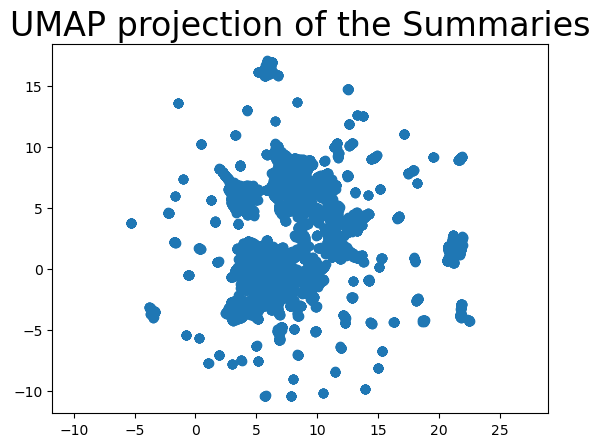

In [126]:
import matplotlib.pyplot as plt
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    # c=[sns.color_palette()[x] for x in penguins.species.map({"Adelie":0, "Chinstrap":1, "Gentoo":2})])
)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Summaries', fontsize=24)

In [173]:
import hdbscan
labels = hdbscan.HDBSCAN(
    min_samples=2,
    min_cluster_size=10,
    # metric='haversine'
).fit_predict(embedding)

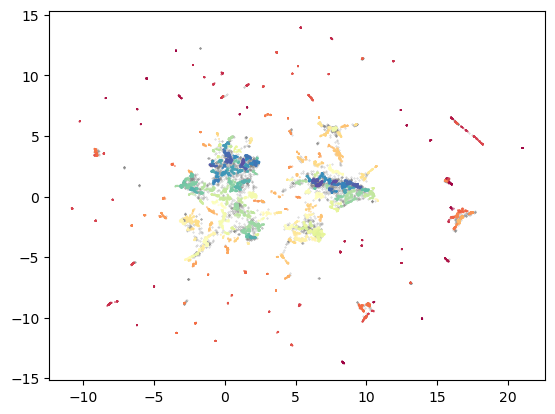

In [174]:
clustered = (labels >= 0)
plt.scatter(embedding[~clustered, 0],
            embedding[~clustered, 1],
            color=(0.5, 0.5, 0.5),
            s=0.1,
            alpha=0.5)
plt.scatter(embedding[clustered, 0],
            embedding[clustered, 1],
            c=labels[clustered],
            s=0.1,
            cmap='Spectral')

# Recommendations

In [175]:
result['cluster'] = labels
result = result.copy()

In [212]:
from sklearn.metrics.pairwise import cosine_similarity

# result.set_index(['id'])

def compute_score(scoring_book, rated_book, rating, cosine_weight = 0.5, cluster_weight = 0.5):
    sb = clusterable.loc[scoring_book]
    rb = clusterable.loc[rated_book]
    score = rating * (cosine_weight * cosine_similarity(sb.array.reshape(1, -1), rb.array.reshape(1, -1))[0][0])
    return score

In [199]:
clusterable.loc[20].array

<NumpyExtensionArray>
[                  11.0,   0.005110925529152155,  0.0010671572526916862,
  -0.019956283271312714,   0.023811297491192818,  0.0012056599371135235,
   0.049638472497463226, -0.0009032613015733659,     0.0248134583234787,
   0.005342364776879549,
 ...
    0.03446990344673395,    0.06039569666609168,   -0.15237700007855892,
 -0.0036830524913966656,  -0.006131426664069295,   -0.03912099730223417,
    -0.1352720521390438,   -0.10496517503634095,    0.03994312975555658,
 -0.0023058028891682625]
Length: 1921, dtype: float64

In [213]:
compute_score(24, 20, 1)

0.4381849503177405

In [243]:
books = [
    (1, 15),
    (-1, 19),
    (-1, 17),
    (1, 42)
]
ratings = pd.DataFrame({
    'rating': [0] * len(result)
}, index=result.index)
for score, book_id in books:
    book = result.loc[book_id]
    potentials = result[result['cluster'] == book['cluster']]
    for index, potential in potentials.iterrows():
        r = potential
        ratings.loc[index, 'rating'] += compute_score(book_id, index, score)

ratings

,rating
id,
1,-0.471522
2,-0.470914
3,0.000000
4,0.000000
5,-0.470856
...,...
16058,0.000000
16059,0.000000
16060,0.000000


In [245]:
sorted_ratings = ratings.sort_values('rating',ascending = False)
sorted_ratings[0:5]

,rating
id,
42,0.500000
15,0.500000
2701,0.498306
2489,0.498093
43,0.497480


In [253]:
def get_book(id):
    return result[id]

In [254]:
pd.concat([get_book(r) for r in sorted_ratings[0:5].index])

KeyError: 42

In [255]:
get_book(1)

KeyError: 1